# Students Do: PCA in Action

In this activity, you will use PCA to reduce the dimensions of the consumers shopping dataset from `4` to `2` features. After applying PCA, you will use the principal components data, to fit a K-Means model with `k=6` and make some conclusions.

In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Load the data
file_path = Path("../Resources/shopping_data_cleaned.csv")
df_data = pd.read_csv(file_path)
df_data.head()

,Previous Shopper,Age,Annual Income,Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [4]:
# Standardize the data
data_scaled = StandardScaler().fit_transform(df_data)
print(data_scaled[0:5])

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


In [5]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data data.
data_pca = pca.fit_transform(data_scaled)

In [6]:
# Transform PCA data to a DataFrame
df_data_pca = pd.DataFrame(
    data=data_pca, columns=["principal component 1", "principal component 2"]
)
df_data_pca.head()

,principal component 1,principal component 2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


In [7]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

**Sample Analysis**

According to the explained variance, the first principal component contains `33.7%` of the variance and the second principal component contains `26.2%` of the variance. Since we have `59.9%` of the information in the original dataset, we will see whether increasing the number of principal components to 3 will increase the explained variance.

C:\Users\Pangloss\.conda\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


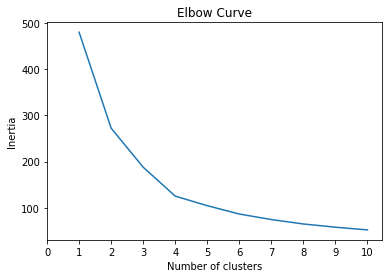

In [10]:
# Finding the best value for k
import matplotlib.pyplot as plt
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_data_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_data_pca)

# Predict clusters
predictions = model.predict(df_data_pca)

# Add the predicted class column to the dataframe
df_data_pca["class"] = model.labels_
df_data_pca.head()

,principal component 1,principal component 2,class
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,1
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,0


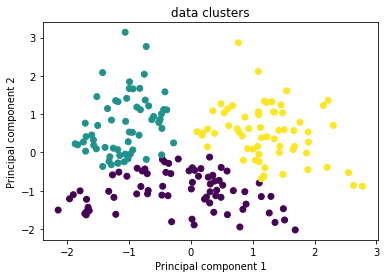

In [12]:
# Fetch the explained variance
# Visualize the clusters
plt.scatter(x=df_data_pca['principal component 1'], y=df_data_pca['principal component 2'], c=df_data_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('data clusters')
plt.show()

**Sample Analysis**

With three principal components, we have `83.1%` of the information in the original dataset. We therefore conclude that three principal components preserves.

In [10]:
# Initialize the K-Means model

# Fit the model

# Predict clusters

# Add the predicted class columns


In [11]:
# BONUS: plot the 3 principal components
# import plotly.express as px
# fig = px.scatter_3d(
#     df_shopping_pca,
#     x="principal component 3",
#     y="principal component 2",
#     z="principal component 1",
#     color="class",
#     symbol="class",
#     width=800,
# )
# fig.update_layout(legend=dict(x=0, y=1))
# fig.show()